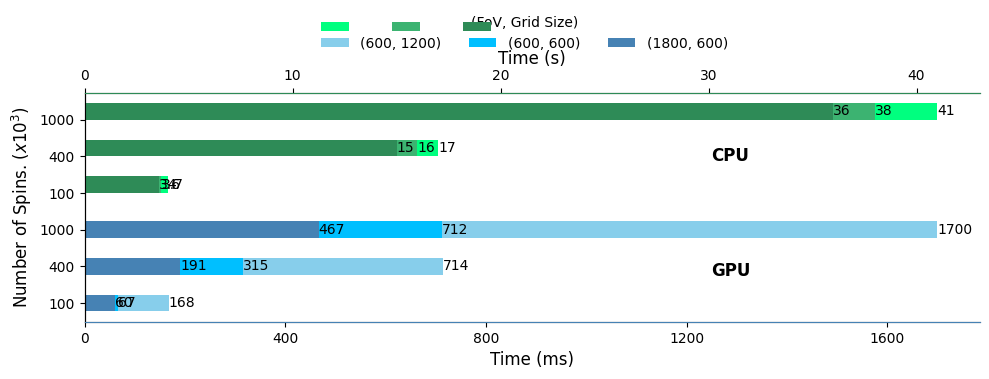

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['svg.fonttype'] = 'none' # to embed fonts in SVG output

# Data
walkers = ["100", "400", "1000", "100", "400", "1000"]

gpu_fov1800res600 = [60, 191, 467]
gpu_fov600res600  = [67, 315, 712]
gpu_fov600res1200 = [168, 714, 1700]

cpu_fov1800res600 = [3.6, 15, 36]
cpu_fov600res600  = [3.7, 16, 38]
cpu_fov600res1200 = [4.0, 17, 41]

# Plot
x = np.arange(len(gpu_fov1800res600))
width = 0.45 # the width of the bars

plt.close('all')
fig, ax = plt.subplots(figsize=(10, 4))

rects1 = ax.barh(x, gpu_fov600res1200, width, label='(600, 1200)', color='skyblue')
ax.bar_label(rects1)
rects2 = ax.barh(x, gpu_fov600res600, width, label='(600, 600)', color='deepskyblue')
ax.bar_label(rects2)
rects3 = ax.barh(x, gpu_fov1800res600, width, label='(1800, 600)', color='steelblue')
ax.bar_label(rects3)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.spines['right'].set_visible(False)
ax.text(0.7, 0.2, 'GPU', transform=ax.transAxes, fontsize=12, weight='bold')

x = np.arange(start=len(gpu_fov1800res600), stop=len(gpu_fov1800res600)+len(cpu_fov1800res600))
ax2 = ax.twiny()
rects1 = ax2.barh(x + width/2, cpu_fov600res1200, width, label=' ', color='springgreen')
ax2.bar_label(rects1)
rects2 = ax2.barh(x + width/2, cpu_fov600res600, width, label=' ', color='mediumseagreen')
ax2.bar_label(rects2)
rects3 = ax2.barh(x + width/2, cpu_fov1800res600, width, label=' ', color='seagreen')
ax2.bar_label(rects3)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_color('seagreen')
ax2.spines['bottom'].set_color('steelblue')
ax2.text(0.7, 0.7, 'CPU', transform=ax.transAxes, fontsize=12, weight='bold')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax2.set_yticks(np.arange(6))
ax2.set_yticklabels(walkers)
ax.set_ylabel('Number of Spins. $(x10^3)$', fontsize=12)

ax.legend(title='(FoV, Grid Size)', ncols=len(x), bbox_to_anchor=(.25, 1.13), loc='lower left', frameon=False)
ax2.legend(ncols=len(x), bbox_to_anchor=(.25, 1.2), loc='lower left', frameon=False)
ax.patch.set_visible(False)
ax2.patch.set_visible(False)

# fig.patch.set_visible(False)
fig.tight_layout()

plt.savefig('../../figures_pdf/benchmark.pdf', format='pdf', dpi=1200, bbox_inches='tight')
plt.show()